In [ ]:
!pip install umap-learn

In [ ]:
!pip install umap-learn[plot]

In [ ]:
!pip install -U scikit-learn==1.0.2

In [ ]:
!curl -OL https://raw.githubusercontent.com/aguilarls/practicas/main/Algebra-computarizada/files.tar.xz && tar -xf ./files.tar.xz

# 1. Aplicaciones de algebra lineal en datasets

In [1]:
from helpers import *

## 2. Dataset

Para esta aplicacion, vamos a usar un subset del dataset __MNIST__. Este dataset contiene imagenes de numeros del 0 al 9 escritos a mano. Las dimensiones de las imagenes son `28 * 28` pixeles. Usaremos la siguiente funcion para cargar los datos.

In [2]:
data, targets = get_data('data')

Podemos inspeccionar las dimensiones del dataset set con el siguiente comando:

In [3]:
data.shape

(14000, 784)

Como podemos observar, existen 14000 filas y 784 columnas. Ahora vamos a visualizar una parte del dataset. Para ello ejecutaremos el siguiente comando:

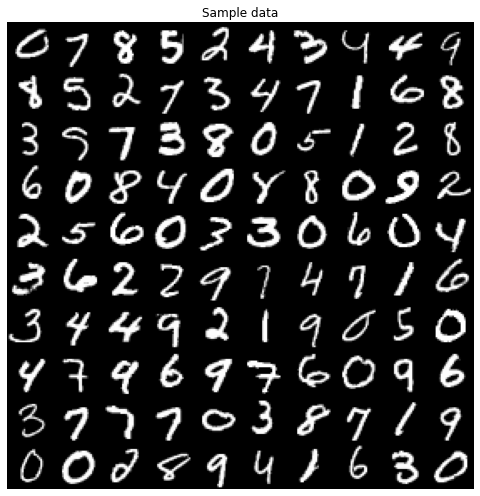

In [4]:
plot_data(data)

## 3. Preprocesamiento

En esta seccion vamos a realizar el preprocesamiento de los datos. Esta es una etapa fundamental que se debe de realizar antes de poder aplicar redes neuronales. Existen diversas opciones de preprocesamiento, se debe de elegir la que mas se adecua a los datos y modelo a usar. En este caso vamos a __escalar__ (transformar) los datos aplicando la siguiente ecuacion:

$$
\large X_{s} = X_{\sigma} * (a - b) + b
$$
Donde:
* $ \large X_{\sigma} = \frac{X - X_{min}}{X_{max} - X_{min}}$
* $a$ representa el limite inferior.
* $b$ representa el limite mayor.

Ya que vamos a trabajar con __redes neuronales__, vamos a usar `0` y `1` para los intervalos $(a,b)$, esto ayudara a la convergencia de nuestra red. Asimismo, ya que estamos trabajando con imagenes, los valores `0` y `1` normalizaran la intensidad de los pixeles. Para la implementacion de la ecuacion vamos a usar la `clase` [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn-preprocessing-minmaxscaler) from `scikit-learn`, donde especificaremos $(a, b)$ con el argumento `feature_range=(0, 1)`

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

Ahora procederemos a preprocesar los datos usando el comando `fit_transform`. Este comando se divide en dos acciones. Primero, `fit` ajusta la ecuacion a los datos, en este caso calcula $X_{\sigma}$. Luego `transform` transforma los datos aplicando la ecuacion. Este proceso nos devuelve los datos __preprocesados__ en la variable `X_train_norm`.

In [7]:
X_train_norm = scaler.fit_transform(data)

Notemos que los valores de `X_train_norm` estan transformados de acuerdo al rango $(a,b)$ previamente definido. Para comprobarlo, imprimamos los valores maximos y minimos con las funciones `max` y `min`:

In [8]:
print('Max value {}'.format(X_train_norm.max()))
print('Min value {}'.format(X_train_norm.min()))

Max value 1.0
Min value 0.0


In [9]:
print(X_train_norm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


---

## 4. Autoencoders

En esta sección, vamos a aplicar una red de autocodificador __(autoencoder)__. Primero comenzaremos definiendo que es un __autoencoder__. Para ello, definamos $h_{\Theta}$ como el __autoencoder__, donde $\Theta$ representa los parametros del modelo. En este contexto, para una entrada $X$, el objetivo del __autoencoder__ es:

$$
h_{\Theta}(X) = d(e(X)) = \hat X
$$

Donde $e(X)$ y $d(e(X))$ estan compuestos por capas y son conocidos como encodificador (__encoder__) y decodificador (__decoder__) respectivamente. La funcion de $e(X)$ consiste en reducir las dimensiones de $X$ hasta llegar a la maxima compresion en la capa de codigo (__code__), donde se obtiene una __representacion encodificada__ $E$. Esta representacion $E$ es usada por $d(E)$ para reconstruir la entrada original $X$ tal que $d(E) = \hat X$.

Para ilustrar mejor este proceso, vamos a definir un __autoencoder__ para nuestro dataset. Para ello, observamos la siguiente figura:

<div align="center">
<img src="https://raw.githubusercontent.com/aguilarls/practicas/main/Algebra-computarizada/images/autoencoder.png" />
</div>

Como podemos apreciar, tenemos de entrada $X$ una imagen compuesta por `28 * 28` pixels. Comenzemos a definir la arquitectura:

__1. Encoder:__ Para poder usar esta representacion, vamos a convertir nuestros datos de matrix en un vector: `28 * 28 = 784`. De esta manera, nuestra capa de entrada cuenta con `784` neuronas. A continuacion definiremos una capa oculta. Para el numero de neuronas consideraremos la reduccion de `8` pixels de la imagen orginal $X$, esto se traduce en: `20 * 20 = 400` neuronas. Ahora procederemos a definir el __code__.

__2. Code:__ A continuacion vamos a definir las unidades del __codigo__, para ello vamos a reducir `10` pixeles al `largo` y `ancho`, obteniendo: `10 * 10 = 100` neuronas. Como siguiente paso procederemos con el __decoder__.

__3. Decoder:__ Para el proceso de construccion del __decoder__ vamos a usar el mismo numero de capas y neuronas del __encoder__ pero de forma invertida. De ese modo, la primera capa tendria: `20 * 20 = 400` neuronas. Finalmente, la capa de salida contendria: `28 * 28 = 784` neuronas.

Es importante notar que, tanto la entrada del __decoder__ como la salida del __encoder__ deben de coincidir en el numero de __neuronas__. Finalmente, como funcion de activacion vamos a usar relu:
$$
x = max(0, x)
$$

In [ ]:
#https://github.com/aguilarls/practicas/tree/main/Sistemas-dinamicos-neuronales

A continuacion, usaremos la siguiente variables para describir el modelo:

In [11]:
# autoencoder model
input_size = 784   # 28 * 28
encoder_size = 400 # 20 * 20
n_encoded = 100    # 10 * 10
decoder_size = 400 # 20 * 20
output_size = 784  # 28 * 28
activation_f = 'relu'

Debido a que usaremos tuplas, agruparemos las capas en el orden adecuado. Para ello usaremos la variable `hidden_layers`.

In [12]:
hidden_layers = (input_size, encoder_size, n_encoded, decoder_size, output_size)

Si queremos construir un __autoencoder__ con más capas, podemos agregarlas usando variables, por ejemplo: `hidden_layers = (input_size, encoder_size_1, encoder_size_2, ..., n_encoded, decoder_size_1, decoder_size_2, ..., output_size)`. Tenga en cuenta que `input_size` debe tener las mismas dimensiones que `otput_size`

Para la construccion del __autoencoder__ usaremos la clase [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn-neural-network-mlpregressor) de `scikit-learn`.

In [13]:
from sklearn.neural_network import MLPRegressor

A continuacion definiremos los `epochs` y el ratio de aprendizaje `lr`:

In [14]:
# training hyper-params
epochs = 100
lr = 0.001

In [16]:
auto_encoder = MLPRegressor(hidden_layer_sizes = hidden_layers,
                            max_iter = epochs, 
                            learning_rate_init = lr,
                            activation = activation_f,
                            verbose = 1)

Antes de proceder, nos aseguraremos de que nuestra arquitectura este correcta:

In [17]:
eval_autoencoder(auto_encoder)

La arquitectura esta correcta!


Para el entrenamiento, usaremos los datos __preprocesados__ `X_train_norm` como $(X,y)$, ya que deseamos aprender a reconstruir los datos originales $X$, la entrada y salida son las mismas.

In [18]:
auto_encoder.fit(X_train_norm, X_train_norm)

Iteration 1, loss = 0.02464674
Iteration 2, loss = 0.01287376
Iteration 3, loss = 0.00999379
Iteration 4, loss = 0.00872622
Iteration 5, loss = 0.00787594
Iteration 6, loss = 0.00732942
Iteration 7, loss = 0.00695895
Iteration 8, loss = 0.00665300
Iteration 9, loss = 0.00642859
Iteration 10, loss = 0.00621197
Iteration 11, loss = 0.00603971
Iteration 12, loss = 0.00587224
Iteration 13, loss = 0.00574817
Iteration 14, loss = 0.00564541
Iteration 15, loss = 0.00553282
Iteration 16, loss = 0.00542667
Iteration 17, loss = 0.00535798
Iteration 18, loss = 0.00528917
Iteration 19, loss = 0.00518918
Iteration 20, loss = 0.00516320
Iteration 21, loss = 0.00507978
Iteration 22, loss = 0.00507613
Iteration 23, loss = 0.00500699
Iteration 24, loss = 0.00493504
Iteration 25, loss = 0.00488443
Iteration 26, loss = 0.00485452
Iteration 27, loss = 0.00483921
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=(784, 400, 100, 400, 784), max_iter=100,
             verbose=1)

Podemos observar como ha ido evoluacionando el loss con el siguiente grafico.

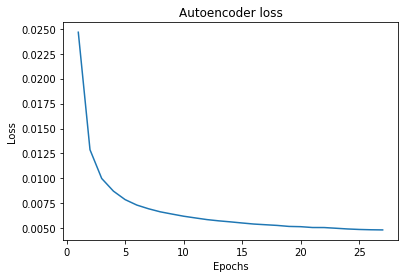

In [19]:
plot_loss(auto_encoder)

Ahora procederemos a realizar algunas predicciones.

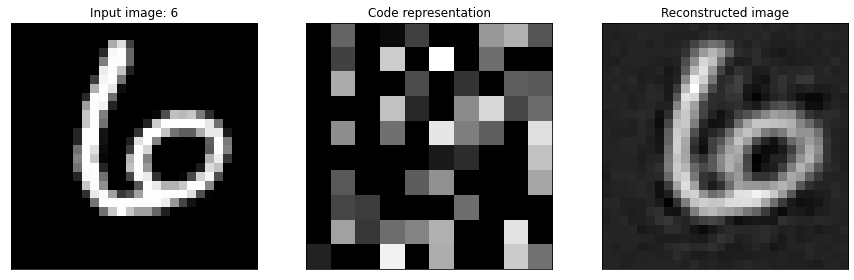

In [20]:
plot_prediction(X_train_norm, auto_encoder, targets)

En la imagen, tenemos como entrada un $X$ original que representa un numero. El grafico del centro muestra la representacion $E$ obtenida por el __codigo__. Finalmente la imagen de la derecha muestra $X^{'}$.

---

## 5. UMAP como alternativa a PCA

Tanto `UMAP` como `PCA` se pueden utilizar para la reducción dimensional. Por ejemplo, sea $X^{(m,n)}$ una matriz de entrada donde $m$ y $n$ representan el total de filas y columnas respectivamente. Asimismo, sea $z$ una nueva dimensión tal que $z < n$. Aplicando `UMAP` o `PCA` sobre la estructura original $X^{(m,n)}$ obtendremos una nueva matriz $X^{(m,z)}$. Dado que tanto `UMAP` como `PCA` guardan información sobre la estructura original $X^{(m,n)}$, es posible realizar la operación __inversa (reconstruccion)__, es decir: $X^{(m,n)} \rightarrow X^{(m,z)}$.

Por supuesto, ambos algoritmos usan __diferentes métodos__ para transformar e invertir tales transformaciones, siendo `UMAP` el mas complejo. Otro caso de uso es la visualización. Por ejemplo: $X^{(m,100)} \rightarrow X^{(m,2|3)}$. En esta sección vamos a transformar y visualizar los datos generados por nuestro __encoder__ $E$ usando ambos algoritmos tal que: $E^{(m,n)} \rightarrow E^{(m,2)}$.

In [21]:
from umap import UMAP
from sklearn.decomposition import PCA

Primero obtendremos $E$, para ello usaremos el __encoder__, el cual nos devolvera los datos en la variable `encoded_data`.

In [22]:
encoded_data = encoder(X_train_norm, auto_encoder)

Como podemos comprobar, $E$ contiene la representacion comprimida de todos los datos:

In [23]:
encoded_data.shape

(14000, 100)

Para este ejercicio vamos a reducir las dimensiones a 2: $E^{(m,100)} \rightarrow E^{(m,2)}$. Para ello, definiremos una variable llamada `new_dims` con las nuevas dimensiones reducidas.

In [24]:
new_dims = 2

Tanto `UMAP` como `PCA` tienen un argumento llado `n_components`, el cual indica a cuantas dimensiones se va a convertir. Para nuestro caso definiremos: `n_components = new_dims`. Asimismo, el argumento `random_state` nos permite obtener resultados reproducibles, para este caso, asignaremos el valor de `5`.

In [25]:
umap = UMAP(n_components = new_dims, random_state = 5)
pca = PCA(n_components = new_dims, random_state = 5)

Ahora procederemos a entrenar y transformar $E$. Para ello proporcionaremos como entrada la variable `encoded_data` a `UMAP` y `PCA`. Asimismo definiremos dos variables: `dims_umap` y `dims_pca` para guardar $E$ con las nuevas dimensiones. 

In [26]:
dims_umap = umap.fit_transform(encoded_data)
dims_pca = pca.fit_transform(encoded_data)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Inspeccionemos las nuevas dimensiones:

In [27]:
print('Original encoded data E: {}'.format(encoded_data.shape))
print('UMAP reduced data E: {}'.format(dims_umap.shape))
print('PCA reduced data E: {}'.format(dims_pca.shape))

Original encoded data E: (14000, 100)
UMAP reduced data E: (14000, 2)
PCA reduced data E: (14000, 2)


Como se puede observar, el numero de filas `m` se mantiene en todos los casos. Sin embargo, el numero de columnas para `UMAP` y `PCA` ha cambiado de $100 \rightarrow 2$. Como tenemos $2$ dimensiones, procedamos a relizar algunas visualizaciones.

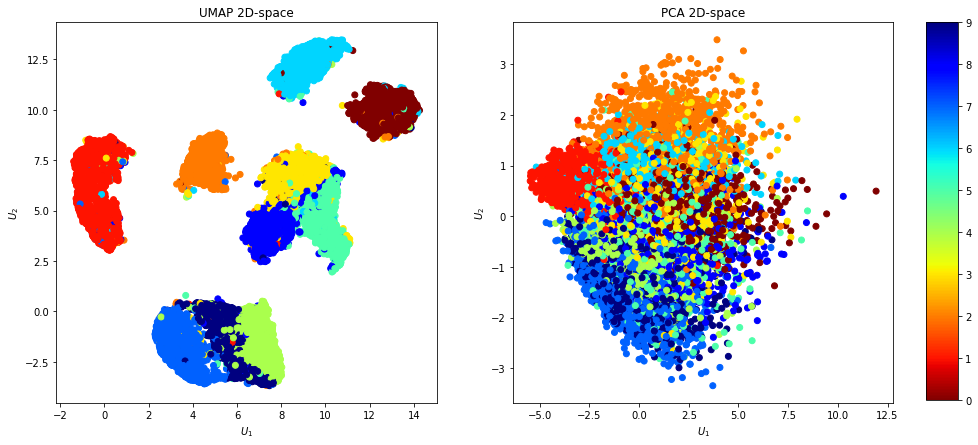

In [28]:
plot_embeddings(dims_umap, dims_pca, targets)

Como habiamos comentado antes, `UMAP` es mas complejo que `PCA`, procedamos ahora a realizar una visualizacion mas compleja de las relaciones entre las distancias del espacio obtenido por `UMAP`.

In [29]:
import umap.plot as plot

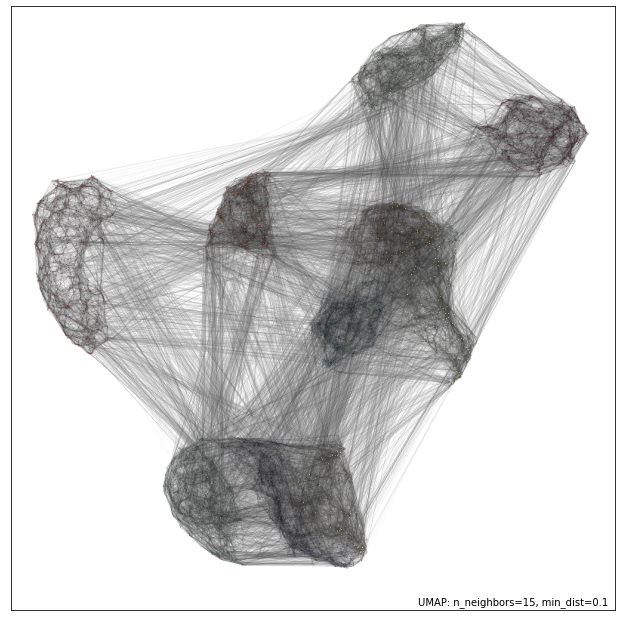

In [30]:
plot.connectivity(umap, show_points=True, labels = targets);

---

## 6. Transformaciones inversas en UMAP (de 2D a 100D):

Como mencionamos en la __seccion 5__ una vez que `UMAP` u `PCA` __aprenden__ a como representar $X^{(m,n)}$ en un __espacio__ $z$; es posible volver al __espacio original__ `n`, tal que: $X^{(m,z)} \rightarrow X^{(m,n)}$. A este proceso se le conoce formalmente como __reconstruccion__ o __transformacion inversa__.

En esta seccion vamos a realizar una transformacion inversa con `UMAP`. Para ello, seleccionaremos aleatoriamente un digito del dataset en la variable `n_class`. Recordemos que solo contamos con digitos en el intervalo $[0,9]$

In [31]:
n_class = 9
sample, indx = get_sample(n_class, dims_umap, targets)

Ahora procedamos a inspeccionar el digito en la variable `sample`.

In [32]:
sample

array([[ 6.789202 , -3.0260699]], dtype=float32)

Como podemos observar contamos con un punto en 2D. Procedemos ahora a visualizar nuestra muestra en el espacio 2D de `UMAP`

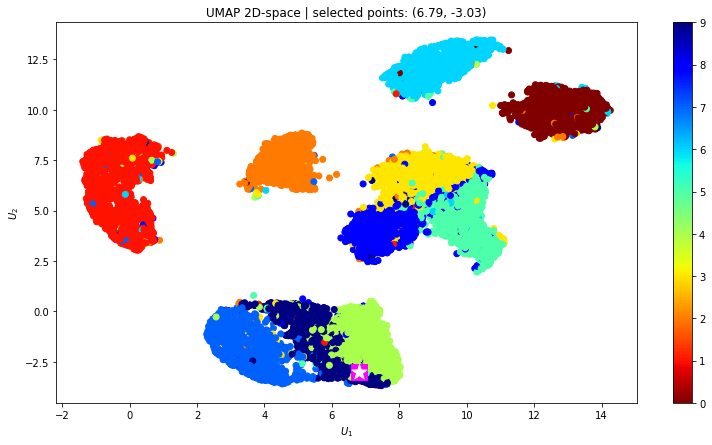

In [33]:
plot_sample(sample, dims_umap, targets)

In [34]:
sample

array([[ 6.789202 , -3.0260699]], dtype=float32)

Para realizar la operacion __inversa__, usaremos como entrada `sample` y generaremos las dimensiones originales en $E$. Para ello usaremos el comando `umap.inverse_transform(sample)`

In [35]:
# transform inverse UMAP
transform_sample = umap.inverse_transform(sample)

Una vez transformado, procedamos a comprobar las dimensiones de la variable `transform_sample`:

In [36]:
print('Umap sample 2D-points: {}'.format(sample.shape))
print('Umap sample inverse transform: {}'.format(transform_sample.shape))
print('Original encoded data E: {}'.format(encoded_data[indx, :].shape))

Umap sample 2D-points: (1, 2)
Umap sample inverse transform: (1, 100)
Original encoded data E: (1, 100)


## 7. Generacion de numeros

Como hemos podido observar hemos sido capaces de convertir las dimensiones de $100 \rightarrow 2$ y viceversa de $2 \rightarrow 100$ usando `UMAP`. En esta seccion vamos a usar los datos de la seccion anterior para generar numeros usando el __decoder__. La idea para esta seccion consiste en usar la muestra en 2D de la variable `sample` para generar una imagen con el __decoder__. Sin embargo, recordemos que `sample` contiene solo $2$ dimensiones, mientras que el __decoder__ espera como entrada $100$. Es alli donde usaremos la __transformacion inversa__ de `UMAP` en `sample` para generar $2 \rightarrow 100$. Esta transformacion se encuentra guardada en la variable `transform_sample` de la seccion anterior. La siguiente línea realizará el método que acabamos de describir:

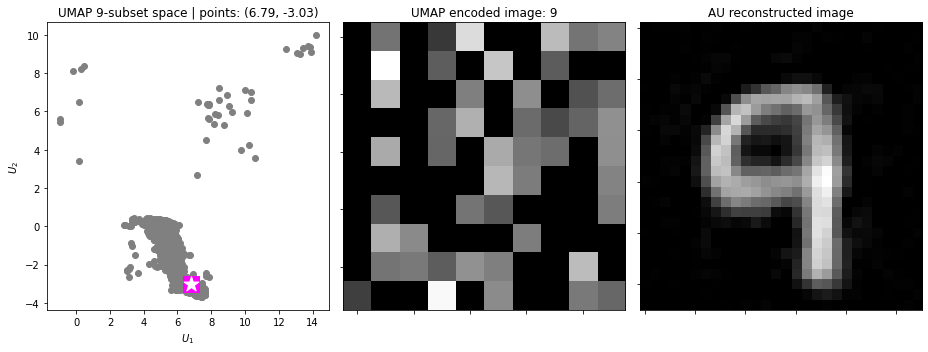

In [37]:
plot_transformation(sample, transform_sample, dims_umap, targets, n_class, auto_encoder)

Notemos que el numero que obtengamos esta definido por la variable `n_class`, si deseamos usar otro numero, tenemos que ejecutar el codigo desde la seccion anterior. Como se puede apreciar hemos generado un numero usando la reconstruccion inversa de `UMAP`. Procedamos ahora a comparar el numero generado usando los datos $E$ y los generados por `UMAP`.

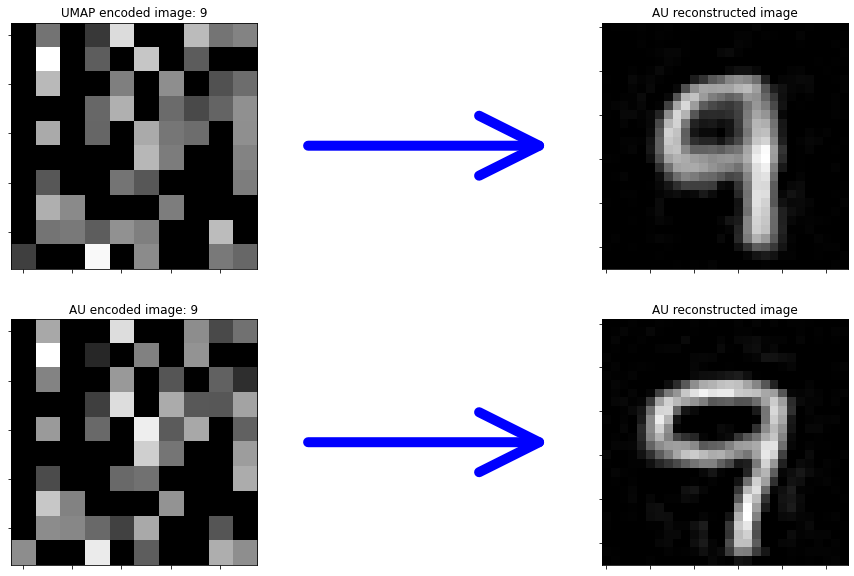

In [38]:
plot_comparison(encoded_data, transform_sample, auto_encoder, targets, indx)

Ahora, exploremos qué tipos de números puede generar nuestro __decodificador__. Para hacerlo, pasaremos todos los datos $E$ que contienen nuestro número seleccionado en la variable `n_class`. Usando estos datos vamos a generar un __subconjunto__ de muestras del número en `n_class`. Finalmente, usando la representacion 2D de `UMAP`, exploraremos en el espacio de UMAP, esto nos mostrará cómo el número en `n_class` puede mutar en diferentes números.

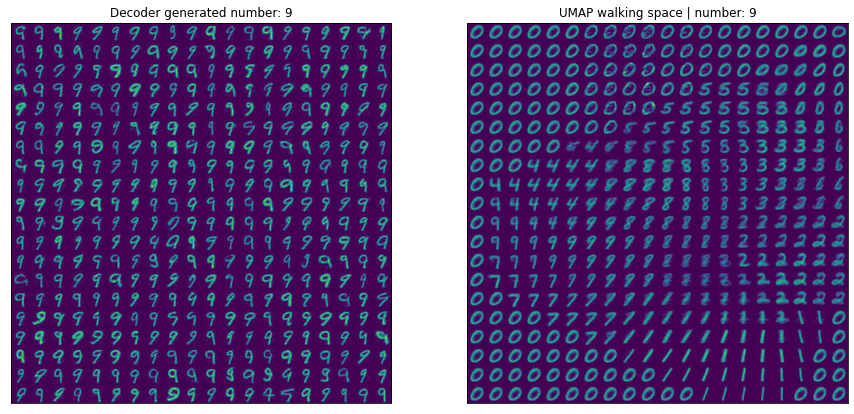

In [39]:
plot_space(dims_umap, encoded_data, n_class, targets, auto_encoder, umap)

---